# Examples for a the possible implementation of symbols in broadbean

In the PR I added a file 'segment_concept.py' that makes another implementation of the segment. I tried to base it as much as possible on the existing code, but needed to deviate at some points. It also not complete of course, but should rather be a minimal implementation.

Here three objects get imported:
- Segment: This is an abstract base class, that takes care of the symbols
- FunctionSegment: This class represents what used to be the segment
- GroupSegmetn: Groups together a number of Segments, so that one of them can have an undefined duration if the total duration of this GroupSegment is given

In [1]:
from broadbean.segment_concept import Segment, FunctionSegment, GroupSegment

## Segment
We can create a segment, even though this will never happen in a real use case because the user will want to use classes derived from it instead. Here I do it for demonstration purposes only. Consider the following example:

In [2]:
s = Segment(duration='waiting_time', val=None, another_property=1)
s.get_all_properties(waiting_time=5, val=2)

{'another_property': 1, 'duration': 5, 'val': 2}

The segment s is created with three *properties* and then get_properties is called with a context and values dictionary and it returns a dictionary of properties with their final (in most cases numeric values). There are three types of properties, all represented here:
- symbol: **duration** gets identified with the global symbol 'waiting_time' that is defined in the *context* passed to get_properties.
- variable value: **val** is a value that is not yet specified, but gets also passed through a value dictionary in get_properties. The difference to the symbol is that val is a value specific to this Segment and the context is globally unique and will appear in other segments with the same value
- fixed value: **another_property** is a fixed value, here simply represented by a number

The name duration is a reserved name as every segment is specified to have a duration. It may, however, be of any of the above categories.

To make the distiction between variable value and symbol clearer consider:

In [3]:
s2 = Segment(duration='waiting_time', val='waiting_time')
s2.get_all_properties(waiting_time=5)

{'duration': 5, 'val': 5}

# FunctionSegment
The function segment forges a function into an array, and obtains the arguments of the function from properties. 

Lets define a linear function:

In [4]:
def my_func(time, slope, offset):
    return time*slope+offset

It can be integrated into a segment like this:

In [5]:
fs = FunctionSegment(function=my_func, duration=1, slope='conduction', offset=1)

As before the properties are:

In [6]:
fs.get_all_properties(conduction=2)

{'duration': 1, 'offset': 1, 'slope': 2}

The segment can now be forged in the context:

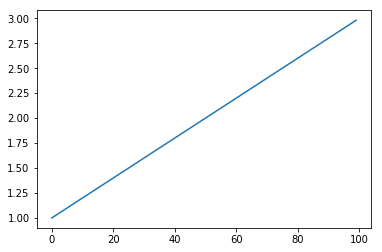

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

# the actual forging
data_trace = fs.forge(100, conduction=2)

plt.plot(data_trace)

# GroupSegment
With the GroupSegment multiple FunctionSegments can be glued together. Specail to the GroupSegment is that if the duration of this segment is specified, then one and only one of the child segments must have an undefined duration.

In this context *undefined duration* means that it is a variable value, ie. it is initializes as *None*.

In [45]:
fs2 = FunctionSegment(function=my_func, duration=None, slope='conduction', offset=1)
gs = GroupSegment(fs2, fs, duration=2)

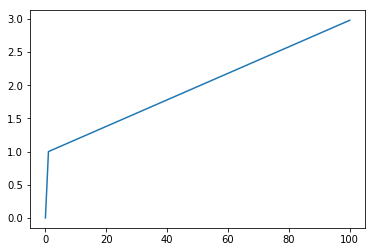

In [46]:
plt.plot(gs.forge(100, conduction=2))

If we give it no duration but two elements of defined duration

In [48]:
gs = GroupSegment(fs, fs, duration=None)
gs.get_all_properties()

{'duration': 2}

In [51]:
#plt.plot(
gs.forge(100, conduction=2)
 #       )

array(0.0)